In [1]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt
import const
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/../")
sys.path.append(fpath)

In [2]:
# from environment_mod import *

from environment_mod import geo2geod
from environment_mod import carpender_anderson
# inspect.getfullargspec(geo2geod) 

from environment_mod import Bmag_dipole, cyclotron, f_lower_hybrid,omega_lower_hybrid,omega_upper_hybrid, omega_plasma
from environment_mod import densities_denton
inspect.getfullargspec(Bmag_dipole) 

FullArgSpec(args=['L_arg', 'lamda_arg'], varargs=None, varkw=None, defaults=None, kwonlyargs=[], kwonlydefaults=None, annotations={})

In [3]:
lat_geo = np.arange(-60,60,0.1)
lon_geo = np.empty(len(lat_geo))
lon_geo.fill(0)
alt_geo = np.empty(len(lat_geo))
alt_geo.fill(1000)
tmp=geo2geod(lat_geo,lon_geo,alt_geo)


#### Magnetic field along a field line

In [4]:
L_shell=4
Bmag=Bmag_dipole(L_shell,np.deg2rad(lat_geo))

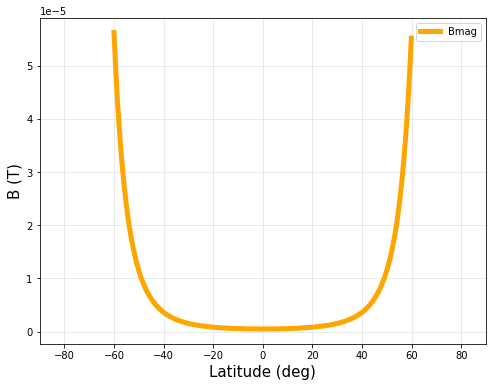

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
s=5
fonts=15
ax.plot(lat_geo,Bmag,c='orange',label='Bmag',linewidth=s)

ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'B (T)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

### frequencies

In [6]:
wce=cyclotron(Bmag,const.qe,const.me)[0]
wcH=cyclotron(Bmag,const.qi,const.mH)[0]
ne0=10*10**(-6)
ne=densities_denton(ne0,np.deg2rad(lat_geo))
wpe=omega_plasma(ne,const.qe,const.me)[0]
wpH=omega_plasma(ne,const.qi,const.mH)[0]

wuhr=omega_upper_hybrid(wce,wpe,wcH,wpH)
wlhr=omega_lower_hybrid(wce,wpe,wcH,wpH)

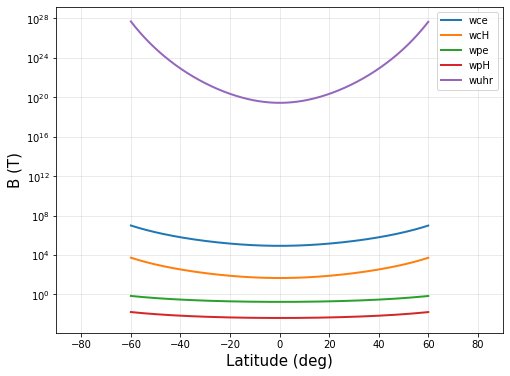

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15
ax.plot(lat_geo,wce,label='wce',linewidth=s)
ax.plot(lat_geo,wcH,label='wcH',linewidth=s)
ax.plot(lat_geo,wpe,label='wpe',linewidth=s)
ax.plot(lat_geo,wpH,label='wpH',linewidth=s)
ax.plot(lat_geo,wuhr,label='wuhr',linewidth=s)
# ax.plot(lat_geo,wlhr,label='wlhr',linewidth=s)

ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'B (T)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

In [8]:

L_final,ne_final=carpender_anderson(1,0,2,90)

print(ne_final)

[1768.8290098144105, 1767.3410582612603, 1765.8545655879198, 1764.3695300117136, 1762.885949752704, 1761.4038230336894, 1759.9231480801986, 1758.4439231204867, 1756.9661463855311, 1755.4898161090205, 1754.0149305273583, 1752.5414878796475, 1751.0694864077002, 1749.5989243560148, 1748.1297999717851, 1746.6621115048936, 1745.1958572078952, 1743.7310353360258, 1742.267644147192, 1740.8056819019664, 1739.3451468635774, 1737.886037297917, 1736.4283514735237, 1734.9720876615836, 1733.517244135923, 1732.0638191730081, 1730.611811051931, 1729.1612180544164, 1727.712038464807, 1726.2642705700653, 1724.817912659765, 1723.3729630260877, 1721.9294199638177, 1720.4872817703376, 1719.0465467456256, 1717.6072131922422, 1716.1692794153355, 1714.7327437226363, 1713.2976044244429, 1711.8638598336277, 1710.4315082656262, 1709.0005480384361, 1707.5709774726095, 1706.1427948912485, 1704.7159986200002, 1703.29058698706, 1701.866558323149, 1700.4439109615312, 1699.022643237994, 1697.6027534908458, 1696.18424

/home/tourgaidis/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


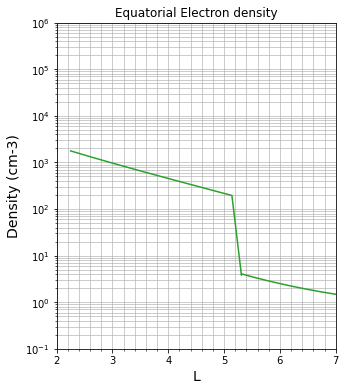

In [9]:
    ###Ne##############################################
    fig, ax = plt.subplots(figsize=(5,6))
    s=5
    ax.set_title('Equatorial Electron density')
    ax.set_xlabel("L",fontsize=14)
    ax.set_ylabel("Density (cm-3)",fontsize=14)

    ax.plot(L_final,ne_final,color="tab:green")

    ax.yaxis.get_ticklocs(minor=True)
    ax.minorticks_on()

    ax.set_yscale('log')
    ax.grid(alpha=.3)
    ax.set_ylim([10**(-1), 10**6])
    ax.set_xlim([2,7])
    ax.grid(True, which="both",alpha=.8)
    plt.show()
###########################################################